# Analyzing Earthquakes 

The National Earthquake Information Center (NEIC) determines the location and size of all significant earthquakes that occur worldwide and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. The NEIC compiles and provides to scientists and to the public an extensive seismic database that  serves as a foundation for scientific research through the operation of modern digital national and global seismograph networks and cooperative international agreements. The NEIC is the national data center and archive for earthquake information.

# This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965. Lets conduct an EDA on the dataset and try to uncover meaningful and/or interesting insights from the dataset. 

# Calling libraries

In [1]:
#from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in data and looking at the number of rows and columns using shape function

In [2]:
NEIC = pd.read_csv('earthquake.csv',sep = ',')
NEIC.shape


pandas.core.frame.DataFrame

In [3]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [11]:
#NEIC[["Latitude","Longitude"]].head()

,Latitude,Longitude
0,19.246,145.616
1,1.863,127.352
2,-20.579,-173.972
3,-59.076,-23.557
4,11.938,126.427


# Lets use the describe() function to get various summary statistics that exclude NaN values

In [22]:
NEIC.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


# There are lot of variables seems carrying lots of missing values. we can remove some of them as they looks like not useful

In [4]:
NEIC = NEIC.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],1)

In [24]:
NEIC.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Identifying the unique factors of Earthquakes

In [27]:
from numpy import unique
print(unique(NEIC.Type))
print(NEIC['Magnitude Type'].unique())      # used like this because there is a space between the words in col

['Earthquake' 'Explosion' 'Nuclear Explosion' 'Rock Burst']
['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' nan 'MWB' 'MWW' 'MWR']


# Lets identify the minimum, maximum and average of the Magnitude of the earthquake

In [8]:
minimum=NEIC["Magnitude"].min()
maximum=NEIC["Magnitude"].max()
average=NEIC["Magnitude"].mean()

print("Minimum: " ,minimum)
print("Maximum: " ,maximum)
print("Average: " ,average)

('Minimum: ', 5.5)
('Maximum: ', 9.1)
('Average: ', 5.882530753460003)


# finding Highly effected areas , assuming the one with Magnitude >8

In [9]:
highly_effected=NEIC[NEIC["Magnitude"]>=8]
print(highly_effected)

             Date      Time  Latitude  Longitude        Type   Depth  \
11     01/24/1965  00:11:17   -2.6080   125.9520  Earthquake   20.00   
16     02/04/1965  05:01:22   51.2510   178.7150  Earthquake   30.30   
538    10/17/1966  21:42:00  -10.6650   -78.2280  Earthquake   40.00   
911    05/16/1968  00:49:02   40.8600   143.4350  Earthquake   29.90   
1663   07/31/1970  17:08:05   -1.5970   -72.5320  Earthquake  644.80   
1983   07/14/1971  06:11:30   -5.5240   153.8500  Earthquake   40.00   
2008   07/26/1971  01:23:22   -4.8170   153.1720  Earthquake   40.00   
2530   12/02/1972  00:19:52    6.4050   126.6400  Earthquake   60.00   
3770   01/14/1976  16:47:34  -28.4270  -177.6570  Earthquake   33.00   
7415   03/03/1985  22:47:07  -33.1350   -71.8710  Earthquake   33.00   
7699   09/19/1985  13:17:47   18.1900  -102.5330  Earthquake   27.90   
7959   05/07/1986  22:47:11   51.5200  -174.7760  Earthquake   33.00   
9484   05/23/1989  10:54:46  -52.3410   160.5680  Earthquake   1

# Lets find out the number of earthquake and the Intensity

In [30]:
def f(x):
    return Series(dict(Number_of_earthquakes = x['ID'].count(),
                       Intensity = x['Magnitude'].mean()
                       ))
f(NEIC)

Number_of_earthquakes    23412.000000
Intensity                    5.882531
dtype: float64

# Lets find out the number of earthquake and its intensity according to the Type of disaster

In [33]:
Earthquake_by_type = NEIC.groupby('Type').apply(f)
Earthquake_by_type

,Number_of_earthquakes,Intensity
Type,,
Earthquake,23232.0,5.882763
Explosion,4.0,5.850000
Nuclear Explosion,175.0,5.850686
Rock Burst,1.0,6.200000


In [44]:
Earthquake_by_type = NEIC.groupby(['Type','Location Source']).mean()
Earthquake_by_type

Latitude   Longitude       Depth  \
Type              Location Source                                      
Earthquake        AEI              61.573857 -151.473429   95.428571   
                  AEIC             57.724025 -130.763475   34.205000   
                  AG               60.642000 -141.593000   15.000000   
                  AGS              59.071588 -145.464412   30.488235   
                  AK               60.683764 -158.572450   59.435714   
                  ATH              36.736836   22.736407   23.278571   
                  ATLAS            38.437333 -121.732833   10.033333   
                  B                38.645500 -121.671500   13.000000   
                  BEO              43.760000   20.730000    0.900000   
                  BOU              51.356000 -176.653000   27.000000   
                  BRK              36.230000 -120.290000    8.000000   
                  CAR              10.200000  -67.010000    6.100000   
                  CASC              8.929500  -84.087250   19.250000   
                  CI               34.488993 -116.991224    8.153633   
                  CSEM             39.220000   41.080000   10.000000   
                  G                44.752500 -110.699000    6.000000   
                  GCMT             15.565714  -71.323571   34.567857   
                  GUC             -30.130826  -71.507261   42.469565   
                  H                17.725857 -144.244143   13.857143   
                  HVO              19.546750 -155.684667   16.725000   
                  ISCGEM           10.079218   57.023027   70.251918   
                  ISK              38.841800   36.516333    7.666667   
                  JMA              36.838000  137.905333   16.333333   
                  LIM             -15.690000  -73.330000  105.000000   
                  MDD              36.053500   -3.769500  304.900000   
                  NC               38.945262 -122.237919   10.772500   
                  NN               39.072300 -117.889900    9.950000   
                  OTT              48.117000  -71.183000   28.900000   
                  PGC              52.858095 -131.653189   12.052632   
                  PR               18.045000  -68.350900   90.000000   
                  ROM              42.961143   12.755286    8.885714   
                  RSPR             18.928667  -65.919667   50.766667   
                  SE               37.909667  -77.936333    0.020000   
                  SJA             -24.872000  -65.602000   10.000000   
                  SLC              39.128000 -110.869000    9.900000   
                  SPE              48.437600 -137.734100   25.120000   
                  TAP              24.310000  121.490000   15.200000   
                  TEH              31.028714   52.084714   13.971429   
                  THE              38.003667   22.102333   26.933333   
                  THR              26.523333   57.692333   15.866667   
                  TUL              35.978550  -96.847050    5.378500   
                  U                42.061000 -112.548000    5.000000   
                  UCR               9.954000  -84.313000   72.800000   
                  UNM              17.377476  -98.273567   75.823810   
                  US               -0.310625   40.347906   72.431510   
                  US_WEL          -41.727200  174.145325    9.189500   
                  UW               45.023194 -122.511639   21.670000   
                  WEL             -41.066611  134.003278   38.766667   
Explosion         US               19.874500  -36.292250    0.000000   
Nuclear Explosion CI               37.282278 -116.421958    1.625000   
                  US               40.626442   37.504270    0.202454   
Rock Burst        US              -47.911000   99.593000    1.000000   

                                   Magnitude  
Type              Location Source             
Earthquake        AEI               5.785714  
      

In [45]:
Earthquake_by_type = NEIC["Magnitude"].groupby(NEIC['Type']).mean()
Earthquake_by_type

Type
Earthquake           5.882763
Explosion            5.850000
Nuclear Explosion    5.850686
Rock Burst           6.200000
Name: Magnitude, dtype: float64

# importing module for handling date object

In [49]:
import datetime as dt

# Check for 'dtype' of Date

In [13]:
NEIC.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
Type                 object
Depth               float64
Magnitude           float64
Magnitude Type       object
ID                   object
Source               object
Location Source      object
Magnitude Source     object
Status               object
dtype: object

# Transforming Date from miscellaneous objects to datetime class

In [50]:
NEIC['Date'] = pd.to_datetime(NEIC['Date'])

# set Date column as index

In [51]:
NEIC = NEIC.set_index(['Date'])
NEIC.head(2)

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic


# Populate the number of Earthquakes by Weekday

In [52]:
Earthquake_by_weekday = NEIC.groupby(NEIC.index.weekday).apply(f)
print(len(Earthquake_by_weekday))
Earthquake_by_weekday

7


,Number_of_earthquakes,Intensity
Date,,
0,3349.0,5.896503
1,3244.0,5.874220
2,3431.0,5.888968
3,3306.0,5.875430
4,3362.0,5.874450
5,3433.0,5.881072
6,3287.0,5.886708


# Populate the number of Earthquakes by Week

In [53]:
Earthquake_by_week = NEIC.groupby(NEIC.index.week).apply(f)
print(len(Earthquake_by_week))
Earthquake_by_week

53


,Number_of_earthquakes,Intensity
Date,,
1,424.0,5.888302
2,400.0,5.851500
3,475.0,5.880779
4,420.0,5.841667
5,451.0,5.881175
6,414.0,5.898551
7,451.0,5.860333
8,465.0,5.859785
9,438.0,5.913950


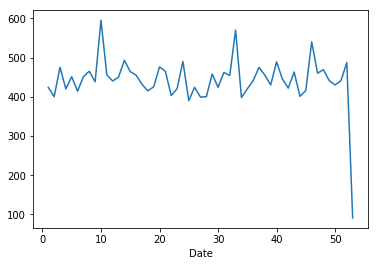

In [54]:
Weekly_dist = Earthquake_by_week['Number_of_earthquakes'].plot(kind = 'line')
Weekly_dist
plt.show()

# Populate the number of Earthquakes by Month

In [55]:
Earthquake_by_month = NEIC.groupby(NEIC.index.month).apply(f)
print(len(Earthquake_by_month))
Earthquake_by_month

12


,Number_of_earthquakes,Intensity
Date,,
1,1891.0,5.874849
2,1829.0,5.877037
3,2114.0,5.874598
4,1971.0,5.897260
5,1964.0,5.890214
6,1824.0,5.874271
7,1880.0,5.885883
8,2014.0,5.894374
9,1985.0,5.873804


# Lets plot a bar graph for the number of earthquakes

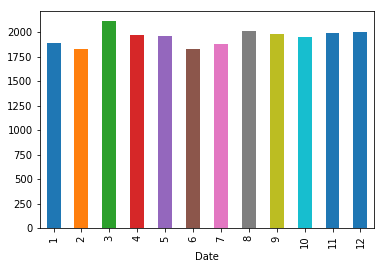

In [57]:
Monthly_dist = Earthquake_by_month['Number_of_earthquakes'].plot(kind = 'bar')

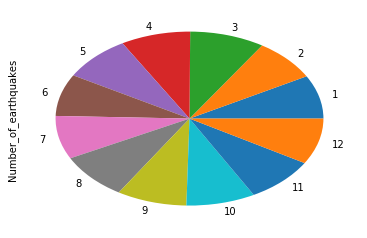

In [58]:
Monthly_dist = Earthquake_by_month['Number_of_earthquakes'].plot(kind = 'pie')

# Populate the number of Earthquakes by Year

In [21]:
Earthquake_by_year = NEIC.groupby(NEIC.index.year).apply(f)
print(len(Earthquake_by_year))
Earthquake_by_year

52


,Intensity,Number_of_earthquakes
Date,,
1965,6.014159,339.0
1966,6.040470,234.0
1967,6.003922,255.0
1968,6.078525,305.0
1969,6.009350,323.0
1970,6.035768,345.0
1971,5.972539,386.0
1972,5.943814,388.0
1973,5.814065,401.0


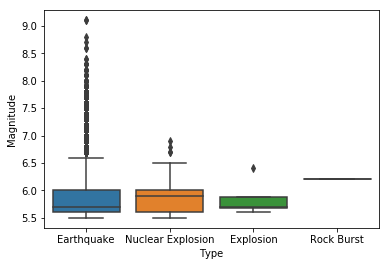

In [22]:
sns.boxplot(x = "Type", y = "Magnitude",data = NEIC)
plt.show()

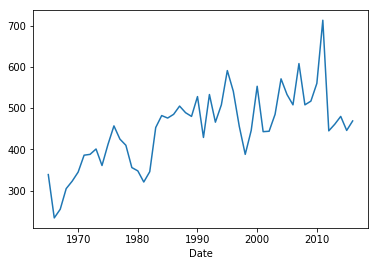

In [23]:
Yearly_dist = Earthquake_by_year['Number_of_earthquakes'].plot(kind = 'line')

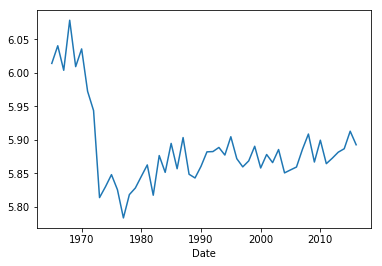

In [24]:
Yearly_dist = Earthquake_by_year['Intensity'].plot(kind = 'line')

# In class lab WAP : Perform EDA on the given data set
    Data Set Name: HR Dataset

HR ANALYTICS DATA DESCRIPTION

Fields in the dataset include:
•	Satisfaction Level
•	Last evaluation
•	Number of projects
•	Average monthly hours
•	Time spent at the company
•	Whether they have had a work accident
•	Whether they have had a promotion in the last 5 years
•	Departments (column sales)
•	Salary
•	Whether the employee has left


Using the dataset, perform an exploratory data analysis (EDA) to identify why are our best and most experienced employees leaving prematurely?. Also, Find the below questions.

1. Find out the number of observations and columns?
2. Check for the missing values?
3. Create a bar chart for finding the department strength?
4. Create a bar chart to find the experience in the company?
5. Create a bar chart to find the average monthly hours spent by employee in a department?
6. Create a histogram for satisfaction level?
7. Create a histogram for number of projects?
8. Create a bar chart for salary-wise attrition(low, medium and high)?
9. How many employees have left the company? 
10. How many employees got promoted in the last 5 years? 
11. How many employees had suffered from work accidents? 
12. How many employees are present in each department? 
13. How many employees are present in different salary ranges(high, low, medium)?
14. How many employees of each salary range are present in different departments? 
15. How many employees got promoted in different departments? 

In [5]:
data=pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [62]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [66]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [67]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [71]:
#1. Find out the number of observations and columns?
data.shape

(14999, 10)

In [72]:
#2. Check for the missing values?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


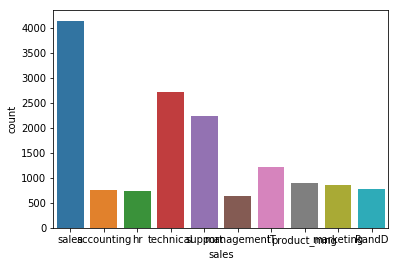

In [86]:
#3. Create a bar chart for finding the department strength?
sns.countplot(x='sales',data=data)
plt.show()

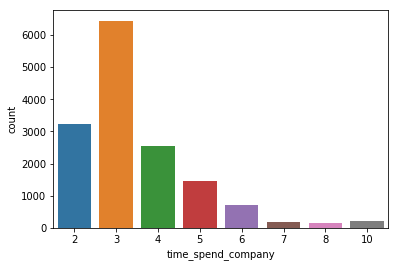

In [82]:
#4. Create a bar chart to find the experience in the company?
sns.countplot(x='time_spend_company',data=data)
plt.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


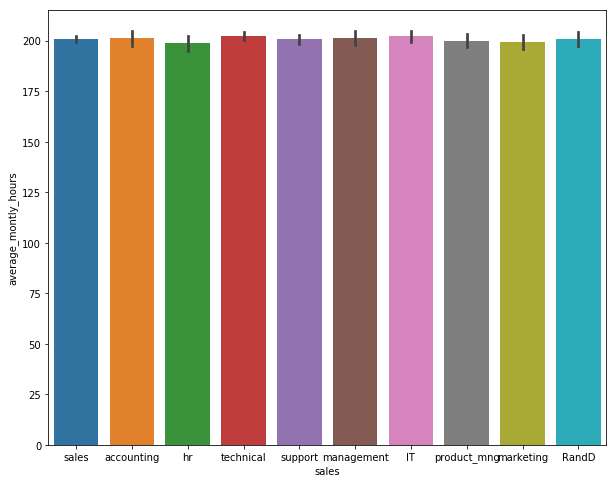

In [254]:
#5. Create a bar chart to find the average monthly hours spent by employee in a department?
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot('sales','average_montly_hours',data=data,ax=ax)
plt.show()

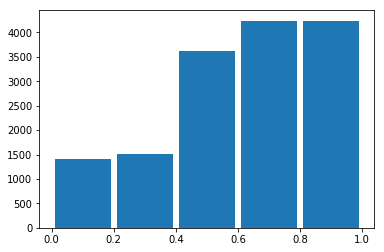

In [250]:
#6. Create a histogram for satisfaction level?
plt.hist(data['satisfaction_level'],rwidth=0.9,bins=[0,.2,.4,.6,.8,1])
plt.show()

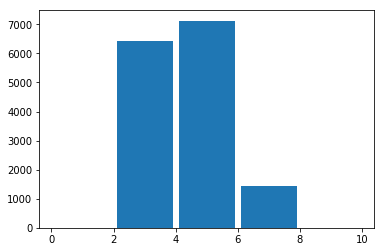

In [251]:
#7. Create a histogram for number of projects?
plt.hist(data['number_project'],rwidth=0.9,bins=[0,2,4,6,8,10])
plt.show()

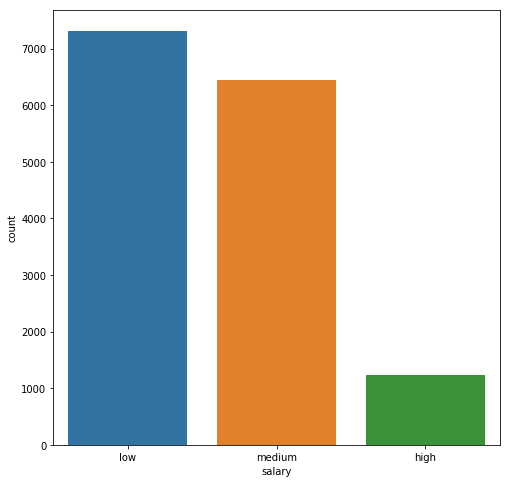

In [131]:
#8. Create a bar chart for salary-wise attrition(low, medium and high)?

fig,ax=plt.subplots(figsize=(8,8))
sns.countplot('salary',data=data,ax=ax)

plt.show()

In [266]:
#9. How many employees have left the company? 

#data[data['left']==1].shape[0]

data.left.value_counts()[1]

3571

In [257]:
def f(x):
    return Series(dict(Count=x["sales"].count()))

f(d1)

d1=data[data['left']==1]
d1.groupby("sales").apply(f)

,Count
sales,
IT,273
RandD,121
accounting,204
hr,215
management,91
marketing,203
product_mng,198
sales,1014
support,555


In [109]:
#10. How many employees got promoted in the last 5 years?
data[data['promotion_last_5years']==1].shape[0]

319

In [110]:
#11. How many employees had suffered from work accidents? 
data[data['Work_accident']==1].shape[0]

2169

In [247]:
#12. How many employees are present in each department? 
def f(x):
    return Series(dict(Count = x['sales'].count()))
f(data)

data.groupby('sales').apply(f)

,Count
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [11]:
#13. How many employees are present in different salary ranges(high, low, medium)?


def f(x):
    return Series(dict(Count = x['salary'].count() ))
f(data)

data.groupby('salary').apply(f)

,Count
salary,
high,1237
low,7316
medium,6446


In [132]:
#14. How many employees of each salary range are present in different departments? 

def f(x):
    return Series(dict(Count = x['salary'].count()
                       ))
f(data)

data.groupby(['salary','sales']).apply(f)

Count
salary sales             
high   IT              83
       RandD           51
       accounting      74
       hr              45
       management     225
       marketing       80
       product_mng     68
       sales          269
       support        141
       technical      201
low    IT             609
       RandD          364
       accounting     358
       hr             335
       management     180
       marketing      402
       product_mng    451
       sales         2099
       support       1146
       technical     1372
medium IT             535
       RandD          372
       accounting     335
       hr             359
       management     225
       marketing      376
       product_mng    383
       sales         1772
       support        942
       technical     1147

In [141]:
#15. How many employees got promoted in different departments?

def f(x):
    return Series(dict(Count = x['sales'].count() ))
f(data)
data=data[data['promotion_last_5years']>0]
data.groupby(['sales']).apply(f)

,Count
sales,
IT,3
RandD,27
accounting,14
hr,15
management,69
marketing,43
sales,100
support,20
technical,28


# Take home assignment***

Based on the previous dataset "HR Analytics", solve the below questions:

1. How much percentage of employees left the company in different departments? 
2. How many employees got promoted in different salary ranges? 
3. How many employees, who got promoted left the company in different salary ranges? 
4. How many employees, who got promoted left the company in different departments? 
5. Average satisfaction level of the company of those who left?
6. Average evaluation points of the company who stayed?
7. Average monthly time spent by employees?
8. Average number of projects that each employee works on?
9. Average monthly hours spent by the employees who “left”?
10. How many employees left after work accident?
11. Which department has the highest satisfaction level?
12. Which department’s employees have the best evaluation?

In [17]:
#1. How much percentage of employees left the company in different departments? 
def f(x):
    return Series(dict(Percentage = (x['sales'].count()/total)*100 ))
f(data)
total=data['sales'].count()
data=data[data['left']==1]
data.groupby(['sales']).apply(f)

,Percentage
sales,
IT,7.644917
RandD,3.388407
accounting,5.712686
hr,6.020722
management,2.548306
marketing,5.684682
product_mng,5.544665
sales,28.395407
support,15.541865


In [220]:
#2. How many employees got promoted in different salary ranges?
def f(x):
    return Series(dict(Count = x['salary'].count() ))
f(data)
data1=data[data['promotion_last_5years']==1]
data1.groupby(['salary']).apply(f)

,Count
salary,
high,72
low,66
medium,181


In [223]:
#3. How many employees, who got promoted left the company in different salary ranges? 
data=pd.read_csv("HR_comma_sep.csv")
data.head()
def f(x):
    return Series(dict(Count = x['salary'].count() ))
f(data)
data1=data[data['promotion_last_5years']==1]
data1=data1[data1['left']==1]
data1.groupby(['salary']).apply(f)

,Count
salary,
low,14
medium,5


In [222]:
#4. How many employees, who got promoted left the company in different departments? 
data=pd.read_csv("HR_comma_sep.csv")
data.head()
def f(x):
    return Series(dict(Count = x['sales'].count() ))
f(data)
data1=data[data['promotion_last_5years']==1]
data1=data1[data1['left']==1]
data1.groupby(['sales']).apply(f)

,Count
sales,
IT,3
management,3
sales,7
support,3
technical,3


In [225]:
#5. Average satisfaction level of the company of those who left?
data1=data[data["left"]==1]
data1['satisfaction_level'].mean()



0.44009801176140917

In [226]:
#6. Average evaluation points of the company who stayed?

data1=data[data['left']==0]
print(data1['last_evaluation'].mean())


0.7154733986699274


In [173]:
#7. Average monthly time spent by employees?
print(data['average_montly_hours'].mean())

201.0503366891126


In [174]:
#8. Average number of projects that each employee works on?
print(data['number_project'].mean())

3.80305353690246


In [303]:
#9. Average monthly hours spent by the employees who “left”?
data[data['left']==1].mean()['average_montly_hours']


207.41921030523662

In [281]:
#10. How many employees left after work accident?
data1=data[data['Work_accident']==1]
data1=data1[data1['left']==1]
data1.shape[0]


169

In [323]:
#10. How many employees left after work accident?
data[data['left']==1].where(data['Work_accident']==1).count()['Work_accident']

169

In [244]:
#11. Which department has the highest satisfaction level?
def f(x):
    return Series(dict(Count = x['satisfaction_level'].mean() ))

f(data)

data1=data.groupby(["sales"]).apply(f)
d2=data1[data1["Count"]==data1.Count.max()]
d2

,Count
sales,
management,0.621349


In [242]:
#12. Which department’s employees have the best evaluation?
def f(x):
    return Series(dict(Count = x['last_evaluation'].mean()))

f(data)


data1=data.groupby(["sales"]).apply(f)
d2=data1[data1["Count"]==data1.Count.max()]
d2


,Count
sales,
management,0.724


In [300]:
#12. Which department’s employees have the best evaluation?
Series(data.groupby(["sales"]).mean()["last_evaluation"]).idxmax()

'management'

In [301]:
#11. Which department has the highest satisfaction level?
Series(data.groupby(["sales"]).mean()["satisfaction_level"]).idxmax()

'management'

In [13]:
a1=np.arange(0,9).reshape(3,3)
np.concatenate([a1,a1],axis=1)                   

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [293]:
a1=Series([1,2,3],index=[0,1,2])
a2=Series([4,5],index=['a','b'])
pd.concat([a1,a2],axis=1) 

,0,1
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
a,NaN,4.0
b,NaN,5.0


In [294]:
pd.concat([a1,a2],axis=0) 

0    1
1    2
2    3
a    4
b    5
dtype: int64